## Expected Gene Loss Time in Sib Mating via Lumped Markov Chain

In [7]:
import numpy as np
import pandas as pd

# Define states
states = ['S', 'A', 'B']

# Transition matrix for lumped Markov chain
P = np.array([
    [0.5, 0.25, 0.25],  # From S
    [0.0, 1.0, 0.0],     # From A (absorbing)
    [0.0, 0.0, 1.0]      # From B (absorbing)
])

# Create a DataFrame for better visualization
transition_matrix_df = pd.DataFrame(P, index=states, columns=states)
print("Lumped Transition Matrix:")
print(transition_matrix_df)

# Extract Q (transient to transient) and R (transient to absorbing)
Q = P[0:1, 0:1]  # 'S' to 'S'
R = P[0:1, 1:]   # 'S' to ['A', 'B']

# Create DataFrames for Q and R
Q_df = pd.DataFrame(Q, index=['S'], columns=['S'])
R_df = pd.DataFrame(R, index=['S'], columns=['A', 'B'])

print("\nTransient Matrix (Q):\n", Q_df)
print("\nAbsorption Matrix (R):\n", R_df)

# Fundamental matrix: N = (I - Q)^-1
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)
N_df = pd.DataFrame(N, index=['S'], columns=['S'])

print("\nFundamental Matrix (N = (I - Q)^-1):\n", N_df)

# Expected number of steps to absorption
t = N @ np.ones((Q.shape[0], 1))
t_df = pd.DataFrame(t, index=['S'], columns=['Expected Steps to Absorption'])

print("\nExpected Steps to Absorption:\n", t_df)

Lumped Transition Matrix:
     S     A     B
S  0.5  0.25  0.25
A  0.0  1.00  0.00
B  0.0  0.00  1.00

Transient Matrix (Q):
      S
S  0.5

Absorption Matrix (R):
       A     B
S  0.25  0.25

Fundamental Matrix (N = (I - Q)^-1):
      S
S  2.0

Expected Steps to Absorption:
    Expected Steps to Absorption
S                           2.0


## Graph Visualization

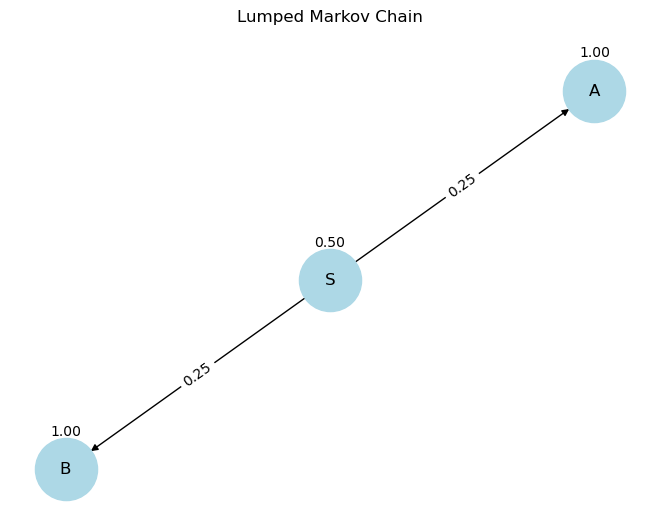

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define states and transitions with probabilities
edges = [
    ('S', 'S', 0.5),
    ('S', 'A', 0.25),
    ('S', 'B', 0.25),
    ('A', 'A', 1.0),
    ('B', 'B', 1.0)
]

# Create directed graph
G = nx.DiGraph()

# Add edges with labels
for src, dst, prob in edges:
    G.add_edge(src, dst, label=f"{prob:.2f}")

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Lumped Markov Chain")
plt.show()
